Crie um Notebook no Google Colab com o nome [ELT574 Semana 2 <Matrícula>], modificando o campo <Matrícula> pela sua matrícula do Sapiens (Exemplo: ELT574 Semana 2 12700-0). Conforme o roteiro abaixo, responda os questionamento e implemente rotinas para realizar os cálculos necessários.

1. Qual é a ideia fundamental que define uma máquina de vetor de suporte (SVM)?

1. O que é um vetor de suporte?

1. Como é apresentado o resultado final de um problema de classificação utilizando SVMs?

1. A escala dos dados é relevante no momento de ajustar um modelo de SVM?


Utilizando as bibliotecas que foram comentadas na aula síncrona, faça a análise do dataset  Iris para que seja preparada para o ajuste de modelos de aprendizado de máquina, conforme o roteiro abaixo:

1. Que tipo de problema que o dataset pretende resolver? Quais é a variável do problema que um modelo de aprendizado de máquina pode ter como valor alvo (desejado)?

1. Quantas amostras estão presentes no dataset? Quantos dados estão presentes no dataset? Quais os nomes das variáveis presentes no dataset? Todas as variáveis são quantitativas? Se não, qual variável é qualitativa? Ela é do tipo ordinária ou nominal?

1. As variáveis quantitativas são contínuas ou discretas? Existe alguma variável com dados faltantes ou inválidos? Se sim, quantos dados estão faltando?

1. Como as variáveis do problema se relacionam, em relação à dispersão? Alguma variável se mostra tendenciosa em relação à variável alvo?

1. Ajuste um modelo de SVM de margens rígidas para classificar as amostras linearmente separáveis do problema, considerando as variáveis de entrada "petal length in cm" e "petal width in cm" do banco de dados.  Adicione o ponto [2.5, 1.1] do tipo Iris setosa e explique o que acontece com a margem rígida da SVM.

1. Para os dados utilizados no Item 5, ajuste um modelo de SVM de margens suaves, com os valores C = 1, 10, 100 e 1000. Comente o que acontece com as margens de cada um dos modelos. Qual se assemelha mais com o modelo de SVM de margens rígidas?

1. Ajuste modelos de SVMs não lineares com funções Kernel Polinomial e Gaussiana para os dados do Item 5. Explique o que acontece com o hiperplano de separação para cada uma das funções Kernel utilizadas.

1. Ajuste um modelo de SVM não linear com função Kernel Gaussiana para os valores de gamma = 0.1, 1 e 10, e valores de C = 1, 10, 100 e 1000. O que acontece ao aumentar o valor de cada parâmetro da função gaussiana? Como estes aumentos afetam a classificação de amostras do problema?

Todas as questões devem ser inseridas no notebook do Google Colab. O link para o notebook deve ser enviado como resposta da tarefa.

# 1a. parte


1. Qual é a ideia fundamental que define uma máquina de vetor de suporte (SVM)?

R. A ideia fundamental das SVM é fazer com que o algoritmo estabeleça uma linha (hiperplano) na representação gráfica do conjunto de dados, que separe as classes de acordo com suas próprias características.


2. O que é um vetor de suporte?

R. É a coordenada da observação individual. 

3. Como é apresentado o resultado final de um problema de classificação utilizando SVMs?

R. O classificador retorna os valores correspondentes às classes do conjunto apresentado. Ex. ```array[1, 1, 0, 2, 1, 1, 0, 1, 0]```.

4. A escala dos dados é relevante no momento de ajustar um modelo de SVM?

R. As SVM são muito sensíveis à escala de dados, sendo comum a aplicação do método ```StandardScaler``` da Scikit-Learn na etapa de preparação dos dados. 

# 2a. parte

In [1]:
# Setup básico
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print('Setup completo!')

Setup completo!


In [2]:
# Carregamento do dataframe
from sklearn import datasets
iris = datasets.load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['label'] = iris.target
df_iris['specie'] = pd.Categorical.from_codes(iris.target, iris.target_names) 
df_iris.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,specie
41,4.5,2.3,1.3,0.3,0,setosa
74,6.4,2.9,4.3,1.3,1,versicolor
134,6.1,2.6,5.6,1.4,2,virginica
88,5.6,3.0,4.1,1.3,1,versicolor
127,6.1,3.0,4.9,1.8,2,virginica


# Resposta 1
Que tipo de problema que o dataset pretende resolver? Quais é a variável do problema que um modelo de aprendizado de máquina pode ter como valor alvo (desejado)?

As SVM são usadas em problemas de classificação (lineares ou não) e regressão. Podem ser úteis, também, para a detecção de _outliers_. 

No caso em estudo, a SVM será utilizada para a classificação. A variável-alvo do dataframe será o "label".

# Resposta 2
Quantas amostras estão presentes no dataset? Quantos dados estão presentes no dataset? Quais os nomes das variáveis presentes no dataset? Todas as variáveis são quantitativas? Se não, qual variável é qualitativa? Ela é do tipo ordinária ou nominal?

Conforme se vê abaixo, o dataframe é composto de 150 entradas. As variáveis (colunas) são: 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'label' e 'specie', cabendo observar que esta última foi criada por mim com o método ```pd.Categorical.from_codes()```, em célula anterior. À exceção das variáveis _label_ e _specie_ (criada por mim), que são qualitativas, as demais são quantidativas e estão na mesma escala (cm). A variável _label_ é nominal.

In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   label              150 non-null    int64   
 5   specie             150 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 6.3 KB


In [4]:
df_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label', 'specie'],
      dtype='object')

# Resposta 3
As variáveis quantitativas são contínuas ou discretas? Existe alguma variável com dados faltantes ou inválidos? Se sim, quantos dados estão faltando?

Usando o método ```describe()``` do pandas é possível constatar que as variáveis 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)' e 'petal width (cm)' são contínuas. Não existem dados faltantes ou inválidos no dataframe.

In [5]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


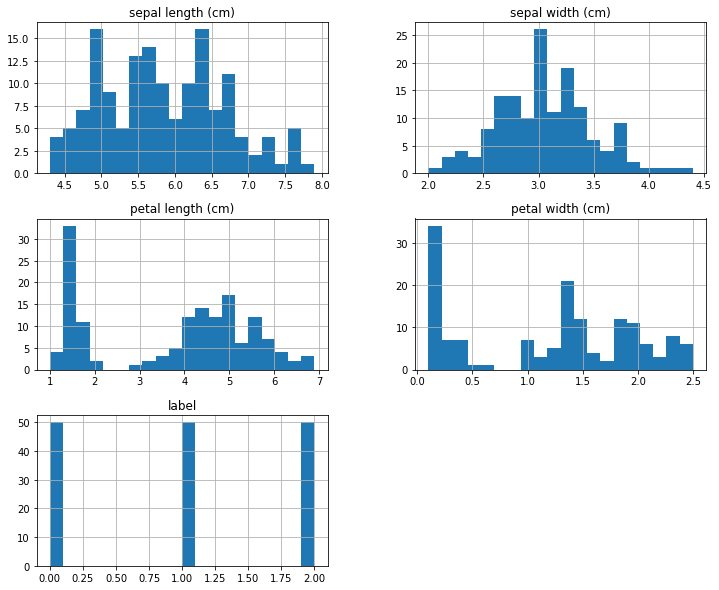

In [6]:
df_iris.hist(bins=20, figsize=(12,10))
plt.show()

# Resposta 4

Como as variáveis do problema se relacionam, em relação à dispersão? Alguma variável se mostra tendenciosa em relação à variável alvo?

A plotagem do tipo _scatter_matrix_ permite verificar a dispersão das variáveis e a correlação. 

A relação com a variável-alvo pode ser vista na última coluna. A variável _'petal length (cm)'_ é a mais tendenciosa em relação ao alvo, como indicam os gráficos seguintes.

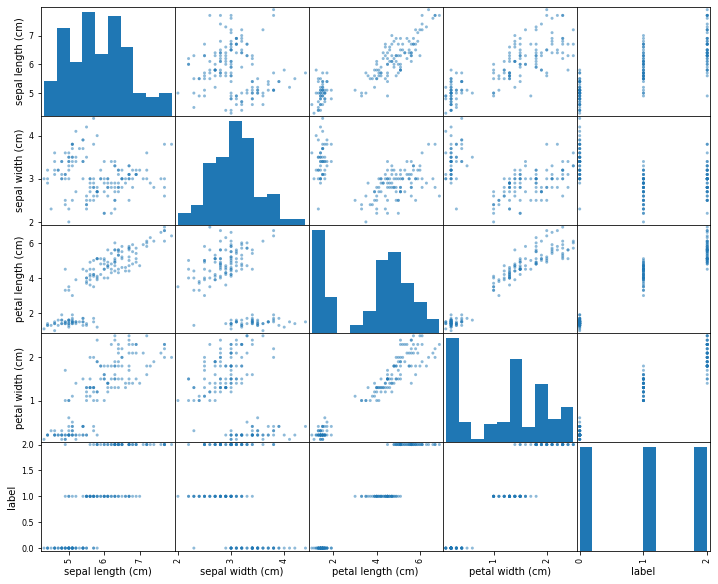

In [7]:
# Graficos de dispersão entre as variáveis com melhores correlações
from pandas.plotting import scatter_matrix

scatter_matrix(df_iris,figsize=(12,10))
plt.show()

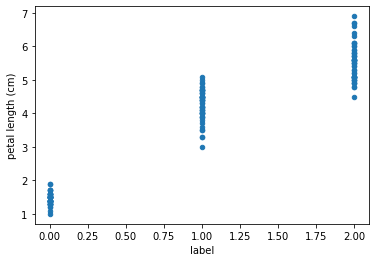

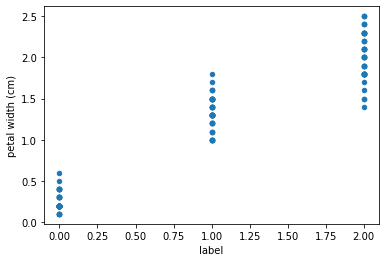

In [8]:
df_iris.plot.scatter(x='label', y='petal length (cm)')
df_iris.plot.scatter(x='label', y='petal width (cm)')
plt.show()

# Resposta 5
Ajuste um modelo de SVM de margens rígidas para classificar as amostras linearmente separáveis do problema, considerando as variáveis de entrada "petal length in cm" e "petal width in cm" do banco de dados. Adicione o ponto [2.5, 1.1] do tipo Iris setosa e explique o que acontece com a margem rígida da SVM.

A saída abaixo comprova que os classificadores de margem rígida só funcionam se os dados forem linearmente separáveis. O algoritmo também é sensível a outliers. É por isso que, em muitos casos, o modelo de margem suave pode atender melhor à demanda.


In [9]:
# Carregando o dataset
X = iris["data"][:, (2, 3)]  #  "petal length in cm" e "petal width in cm"
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]#.astype(np.float64)

In [10]:
from sklearn.svm import SVC

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf")) # Margem rígida
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

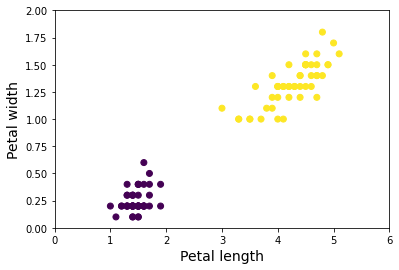

In [11]:
plt.scatter(X[:, 0], X[:,1], c=y)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([0, 6, 0, 2])
plt.show()

In [12]:
# Função para plotar as fronteiras de classificacao (vetor de suporte e hiperplano de suporte)
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # Na fronteira de decisao, w0*x0 + w1*x1 + b = 0
    # Hiperplano de decisao => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA') #identifica os pontos do vetor de suporte
    plt.plot(x0, decision_boundary, "k-", linewidth=2) #hiperplano de suporte
    plt.plot(x0, gutter_up, "k--", linewidth=2) # vetor de suporte +1
    plt.plot(x0, gutter_down, "k--", linewidth=2) # vetor de suporte -1
    plt.annotate('Margin: {}'.format(round(margin,3)),(xmin,xmin)) #exibe o valor da margem de separação

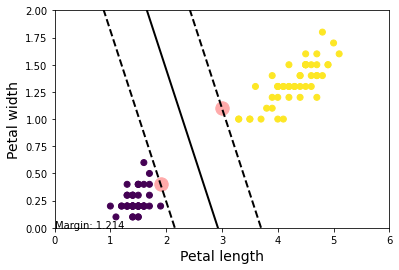

In [13]:
plt.scatter(X[:, 0], X[:,1], c=y)
plot_svc_decision_boundary(svm_clf, 0,5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([0, 6, 0, 2])
plt.show()

In [14]:
# Ref.: https://www.kaggle.com/code/priscylla/plotting-decision-boundaries

def create_decision_boundary(model, X, y):
    # Find the min and maximum x and y coordinates for our data
    x_min, x_max = X[:, 0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    x_in = np.c_[xx.ravel(), yy.ravel()]
    
    y_pred = model.predict(x_in)
    
    y_pred = np.round(y_pred).reshape(xx.shape)
    
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

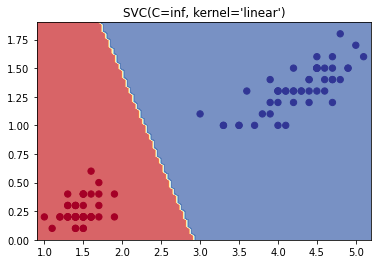

In [15]:
create_decision_boundary(svm_clf, X, y)
plt.title(svm_clf)
plt.show()

In [16]:
# Adicionando um novo ponto [2.5, 1.1] para setosa (0)

X_outliers = np.array([[2.5, 1.1]])
y_outliers = np.array([0])

# Concatenando os dados dos outliers aos dados do problema 
X = np.concatenate([X, X_outliers], axis=0)
y = np.concatenate([y, y_outliers], axis=0)

In [17]:
# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf")) # Margem rígida
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

<ipython-input-12-f9758af6c4b6>:9: RuntimeWarning: divide by zero encountered in double_scalars
  decision_boundary = -w[0]/w[1] * x0 - b/w[1]
<ipython-input-12-f9758af6c4b6>:9: RuntimeWarning: invalid value encountered in multiply
  decision_boundary = -w[0]/w[1] * x0 - b/w[1]
<ipython-input-12-f9758af6c4b6>:9: RuntimeWarning: invalid value encountered in subtract
  decision_boundary = -w[0]/w[1] * x0 - b/w[1]
<ipython-input-12-f9758af6c4b6>:11: RuntimeWarning: divide by zero encountered in double_scalars
  margin = 1/w[1]


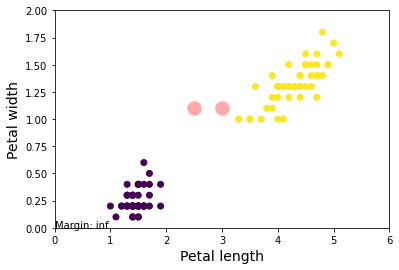

In [18]:
plt.scatter(X[:, 0], X[:,1], c=y)
plot_svc_decision_boundary(svm_clf, 0,5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([0, 6, 0, 2])
plt.show()

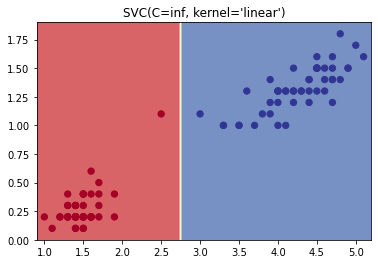

In [19]:
create_decision_boundary(svm_clf, X, y)
plt.title(svm_clf)
plt.show()

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


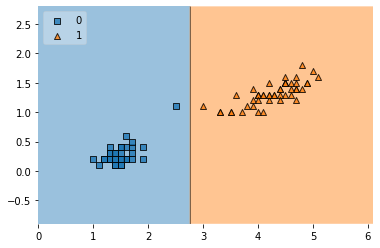

In [20]:
# Teste de plotagem com o uso da biblioteca mlxtend
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X, y=y, clf=svm_clf, legend=2)
plt.show()

# Resposta 6
Para os dados utilizados no Item 5, ajuste um modelo de SVM de margens suaves, com os valores C = 1, 10, 100 e 1000. Comente o que acontece com as margens de cada um dos modelos. Qual se assemelha mais com o modelo de SVM de margens rígidas?

O ajuste do hiperparâmetro C está relacionado às violações das margens. Quanto maior for o valor, maior será a penalização do erro. Em consequência, a margem será mais estreita.

O valor menor de C denota uma menor penalização. 

Um modelo com muitas violações da margem ainda pode ser bom, se considerarmos a sua capacidade de generalização.


In [21]:
# Importações adicionais
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Configurando diferentes SVMs de margens suaves, com C = 1 e C = 100
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=10, loss="hinge", random_state=42)
svm_clf3 = LinearSVC(C=100, loss="hinge", random_state=42)
svm_clf4 = LinearSVC(C=1000, loss="hinge", random_state=42)

#Pipeline de transformacoes em cada uma
scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])
scaled_svm_clf3 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf3),
    ])
scaled_svm_clf4 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf4),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)
scaled_svm_clf3.fit(X, y)
scaled_svm_clf4.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=1000, loss='hinge', random_state=42))])

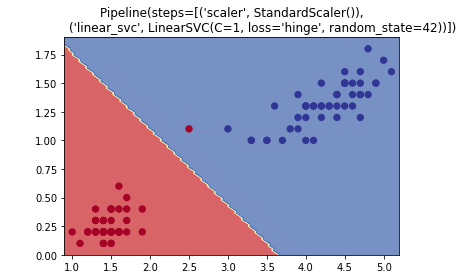

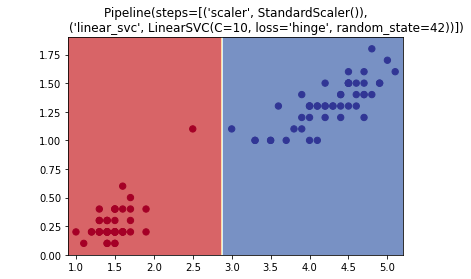

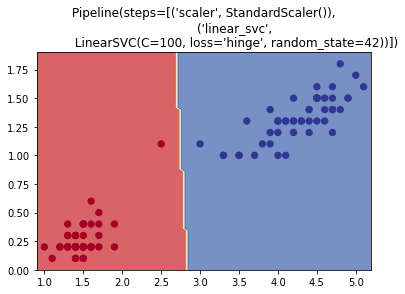

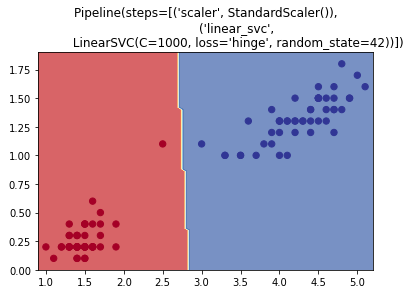

In [22]:
modelos = [scaled_svm_clf1, scaled_svm_clf2, scaled_svm_clf3, scaled_svm_clf4] 
for modelo in modelos:
  create_decision_boundary(modelo, X, y)
  plt.title(modelo)
  plt.show()

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


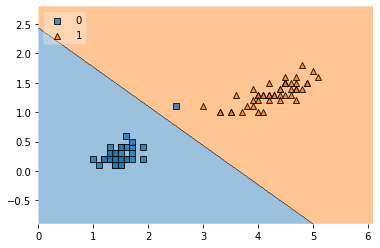

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


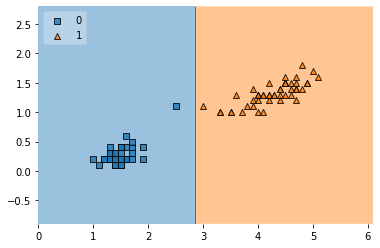

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


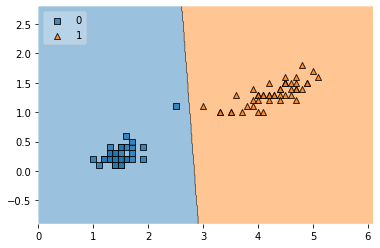

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


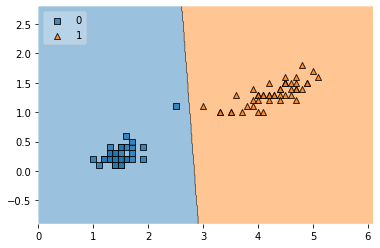

In [23]:
for modelo in modelos:
  plot_decision_regions(X=X, y=y, clf=modelo, legend=2)
  plt.show()

# Resposta 7
Ajuste modelos de SVMs não lineares com funções Kernel Polinomial e Gaussiana para os dados do Item 5. Explique o que acontece com o hiperplano de separação para cada uma das funções Kernel utilizadas.

Com o kernel polinomial, o modelo abarca um grande número de características polinomiais, . Para evitar o sobreajuste, optamos pelo grau 3.

Usando o kernel gaussiano simula a utilização de várias características de similaridade.


In [24]:
polynomial_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel='poly', degree=3, C=10))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=10, kernel='poly'))])

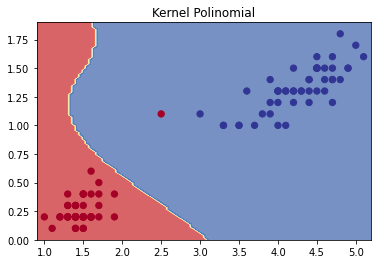

In [25]:
create_decision_boundary(polynomial_svm_clf, X, y)
plt.title('Kernel Polinomial')
plt.show()

In [26]:
gauss_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel='rbf', gamma=5))
    ])

gauss_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(gamma=5))])

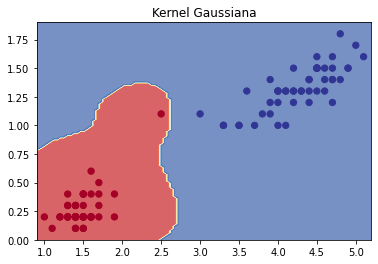

In [27]:
create_decision_boundary(gauss_svm_clf, X, y)
plt.title('Kernel Gaussiana')
plt.show()

# Resposta 8
Ajuste um modelo de SVM não linear com função Kernel Gaussiana para os valores de gamma = 0.1, 1 e 10, e valores de C = 1, 10, 100 e 1000. O que acontece ao aumentar o valor de cada parâmetro da função gaussiana? Como estes aumentos afetam a classificação de amostras do problema?

O valor do hiperparâmetro gamma atua na curva em formato de sino: quanto menor, mais ampla a curva se apresentará. Os gráficos ilustram o que se disse.

In [28]:
from sklearn.svm import SVC

gamma1, gamma2, gamma3 = 0.1, 1, 10
C1, C2, C3, C4 = 1, 10, 100, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma1,C3), (gamma1, C4), \
              (gamma2, C1), (gamma2, C2), (gamma2,C3), (gamma2, C4), \
              (gamma3, C1), (gamma3, C2), (gamma3,C3), (gamma3, C4),   

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

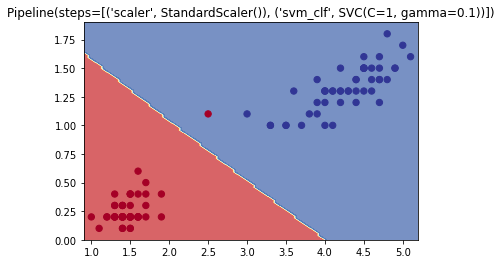

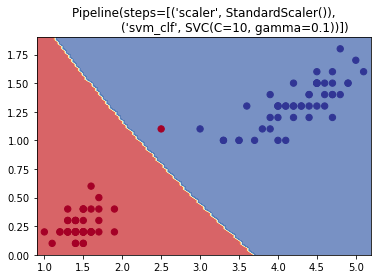

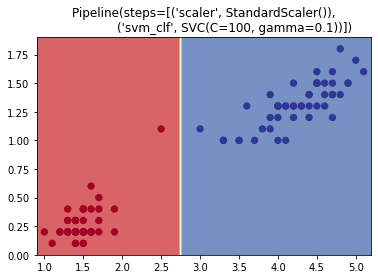

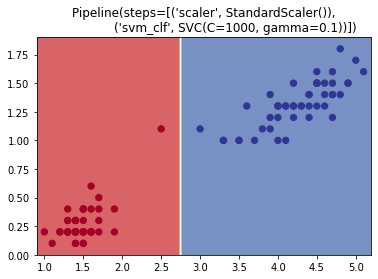

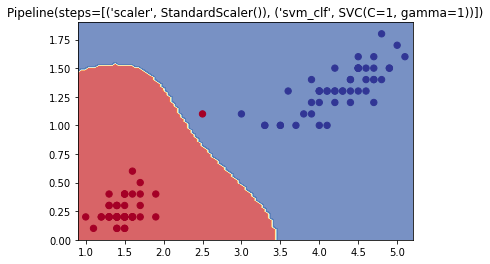

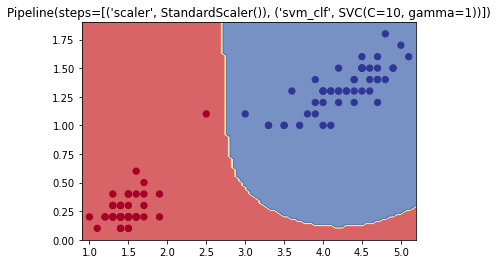

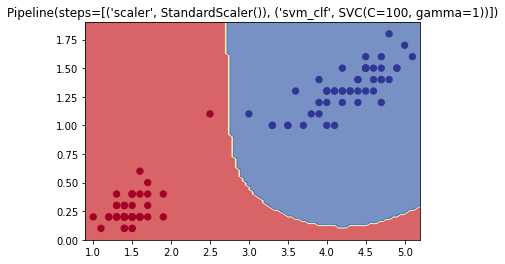

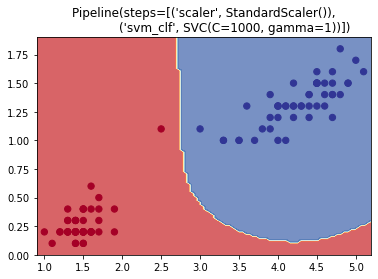

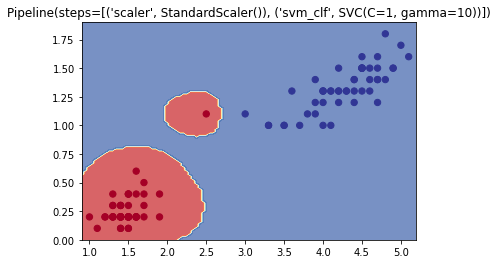

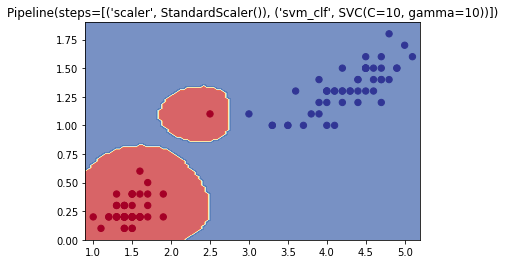

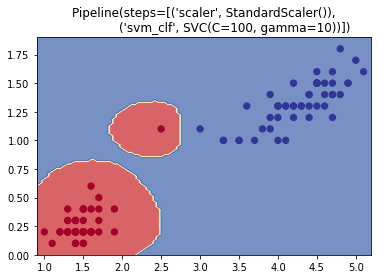

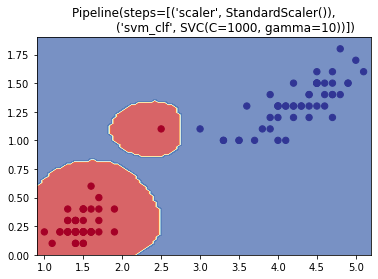

In [29]:
for modelo in svm_clfs:
  create_decision_boundary(modelo, X, y)
  plt.title(modelo)
  plt.show()

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


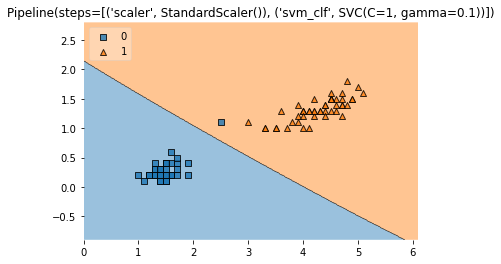

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


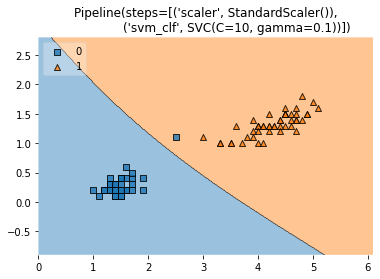

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


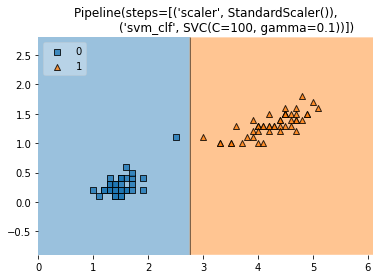

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


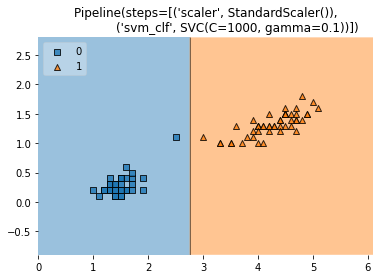

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


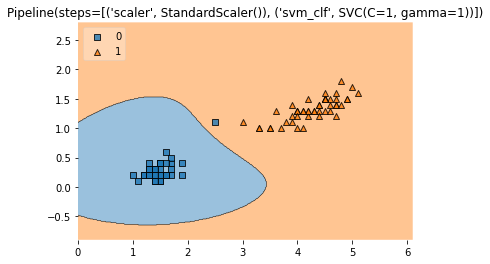

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


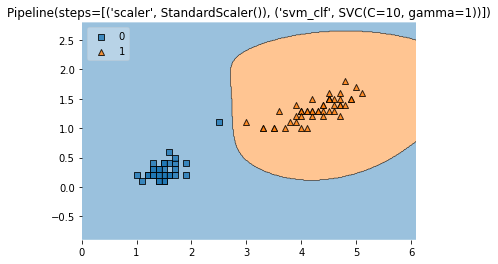

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


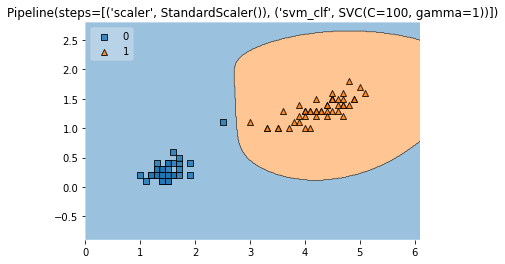

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


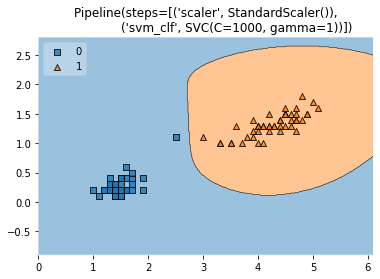

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


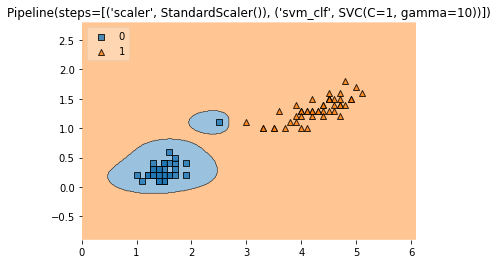

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


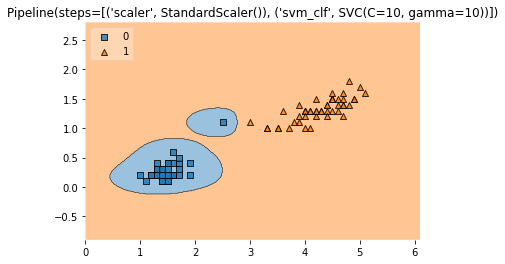

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


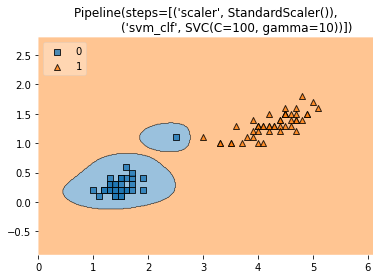

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


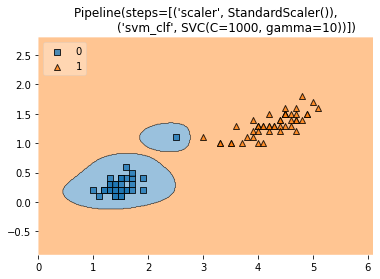

In [30]:
for i in svm_clfs:
  plot_decision_regions(X=X, y=y, clf=i, legend=2)
  plt.title(i)
  plt.show()


Referências: 

https://scikit-learn.org/stable/modules/svm.html#

https://www.youtube.com/watch?v=ba7tMJZbGyA

https://medium.com/geekculture/svm-classification-with-sklearn-svm-svc-how-to-plot-a-decision-boundary-with-margins-in-2d-space-7232cb3962c0
